# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Trần Thị Thanh Vân
- MSSV: 21127478
- Lớp: 21CLC07

# Import

In [45]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần

from sklearn.model_selection import KFold

# For data visualization  
import seaborn as sns  
import matplotlib.pyplot as plt

# Đọc dữ liệu

In [46]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

In [47]:
train = pd.read_csv('train.csv')
train

,Gender,10percentage,12percentage,CollegeTier,Degree,collegeGPA,CollegeCityTier,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,2,87.80,84.00,1,1,73.82,1,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,1,65.00,0,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,1,61.94,0,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,1,80.40,1,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,2,82.00,75.00,2,1,64.30,1,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,1,91.00,73.00,2,2,85.00,0,555,445,485,...,-1,-1,-1,-1,0.8192,1.4368,-0.0537,-1.81790,0.8183,400000
2244,2,75.00,73.00,2,1,70.00,1,505,485,445,...,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2245,2,84.00,77.00,2,1,75.20,0,345,585,395,...,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2246,1,91.40,65.56,2,1,73.19,0,385,425,485,...,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000


# Cài đặt hàm

In [48]:
# Cài đặt các hàm cần thiết ở đây

# Tiền xử lý
def preprocess(x, y):
    X = np.hstack((np.ones((x.shape[0], 1)), x))
    return X, y

# Linear Regression
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = np.round(X_pinv @ y, decimals=3) # round values to 3 decimal places
        return self

    def get_params(self):
        return self.w

    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)

# Sai số (độ lỗi) tuyệt đối trung bình (MAE - Mean Absolute Error)
def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [49]:
# Phần code cho yêu cầu 1a
attributes = ["Gender", "10percentage", "12percentage", "CollegeTier", "Degree", "collegeGPA", "CollegeCityTier", "English", "Logical", "Quant", "Domain"]

X_train = np.array(train.loc[:, attributes])
y_train = np.array(train.iloc[:, -1])

X, y = preprocess(X_train, y_train)
lr = OLSLinearRegression().fit(X, y)

w = lr.get_params()

# công thức hồi quy
print('Salary =', end=' ')
for i in range(len(attributes) + 1):
    print(' + ' if i != 0 else '', f'{w[i]}', f'*{attributes[i-1]}' if i != 0 else '', end='', sep='')

Salary = 49248.09 + -23183.33*Gender + 702.767*10percentage + 1259.019*12percentage + -99570.608*CollegeTier + 18369.962*Degree + 1297.532*collegeGPA + -8836.727*CollegeCityTier + 141.76*English + 145.742*Logical + 114.643*Quant + 34955.75*Domain

In [50]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
X_test = np.array(test.loc[:, attributes])
y_test = np.array(test.iloc[:, -1])

X, y = preprocess(X_test, y_test)

y_hat = lr.predict(X)

print(f'MAE của mô hình gồm 11 đặc trưng đầu: {mae(y_test, y_hat)}')

MAE của mô hình gồm 11 đặc trưng đầu: 105052.4719209937


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [51]:
# Phần code cho yêu cầu 1b

# Hàm cross-validation (X-dữ liệu của các đặc trưng; y-giá trị mục tiêu, k-số lượng fold muốn chia dữ liệu)
# Hàm trả về sai số của 1 mô hình
def kFoldCrossValidation(X, y, k):
    kf = KFold(n_splits=k)
    maeList = [] # các MAE của các fold
    for idxTrain, idxTest in kf.split(X):
        X_train, X_test, y_train, y_test = X[idxTrain], X[idxTest], y[idxTrain], y[idxTest]
        
        X_train_1, y_train = preprocess(X_train, y_train)
        lr = OLSLinearRegression().fit(X_train_1, y_train)
        
        X_test_1, y_test = preprocess(X_test, y_test)
        y_hat = lr.predict(X_test_1)
        maeList.append(mae(y_test, y_hat))
    return np.mean(maeList)

In [52]:
# xáo trộn bộ dữ liệu
trainShuffle = train.sample(frac=1, random_state=162)

attributes = ["conscientiousness", "agreeableness", "extraversion", "nueroticism", "openess_to_experience"]

# Tìm ra đặc trưng tốt nhất
def findBestAttribute(trainData, attributes):
    y_train = np.array(trainData.iloc[:, -1]).reshape(-1, 1)
    resList = []
    for attr in attributes:
        X_train = np.array(trainData.loc[:, attr]).reshape(-1, 1)
        mae = kFoldCrossValidation(X_train, y_train, 5)
        resList.append(mae)
        
    # In ra các kết quả cross-validation như yêu cầu
    df = pd.DataFrame({'Mô hình với 1 đặc trưng': attributes, 'MAE': resList})
    print(df)
    return attributes[np.argmin(resList)]

bestAttri = findBestAttribute(trainShuffle, attributes)
print('Đặc trưng tốt nhất:', bestAttri)

  Mô hình với 1 đặc trưng            MAE
0       conscientiousness  124284.036255
1           agreeableness  123681.158034
2            extraversion  123828.682523
3             nueroticism  123509.720185
4   openess_to_experience  123819.935975
Đặc trưng tốt nhất: nueroticism


In [53]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train = np.array(trainShuffle.loc[:, bestAttri]).reshape(-1, 1)
y_train = np.array(trainShuffle.iloc[:, -1]).reshape(-1, 1)
X, y = preprocess(X_train, y_train)
lr = OLSLinearRegression().fit(X, y)

w = lr.get_params()

# show equation
print(f'Salary = {w[0][0]} + {w[1][0]}*{bestAttri}')

Salary = 304647.553 + -16021.494*nueroticism


In [54]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
X_test = np.array(test.loc[:, bestAttri]).reshape(-1, 1)
y_test = np.array(test.iloc[:, -1]).reshape(-1, 1)

X, y = preprocess(X_test, y_test)

y_hat = lr.predict(X)

print(f'MAE của mô hình sử dụng đặc trưng tính cách tốt nhất - {bestAttri}: {mae(y_test, y_hat)}')

MAE của mô hình sử dụng đặc trưng tính cách tốt nhất - nueroticism: 119361.91748865023


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [55]:
# Phần code cho yêu cầu 1c

# xáo trộn bộ dữ liệu
trainShuffle = train.sample(frac=1, random_state=162)

attributes = ["English", "Logical", "Quant"]

# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
bestAttri = findBestAttribute(trainShuffle, attributes)
print('Đặc trưng tốt nhất:', bestAttri)

  Mô hình với 1 đặc trưng            MAE
0                 English  120830.457098
1                 Logical  119984.661546
2                   Quant  117371.541785
Đặc trưng tốt nhất: Quant


In [56]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train = np.array(trainShuffle.loc[:, bestAttri]).reshape(-1, 1)
y_train = np.array(trainShuffle.iloc[:, -1]).reshape(-1, 1)
X, y = preprocess(X_train, y_train)
lr = OLSLinearRegression().fit(X, y)

w = lr.get_params()

# show equation
print(f'Salary = {w[0][0]} + {w[1][0]}*{bestAttri}')

Salary = 117759.729 + 368.852*Quant


In [57]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
X_test = np.array(test.loc[:, bestAttri]).reshape(-1, 1)
y_test = np.array(test.iloc[:, -1]).reshape(-1, 1)

X, y = preprocess(X_test, y_test)

y_hat = lr.predict(X)

print(f'MAE của mô hình sử dụng đặc trưng tốt nhất - {bestAttri}: {mae(y_test, y_hat)}')

MAE của mô hình sử dụng đặc trưng tốt nhất - Quant: 108814.01637333333


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

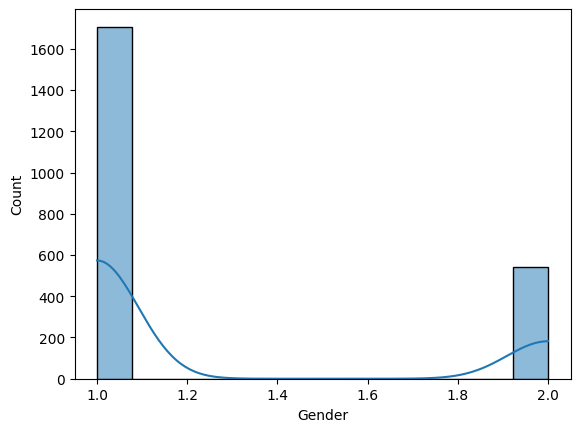

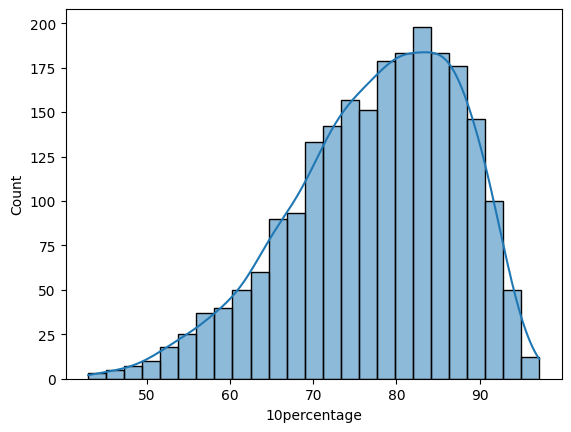

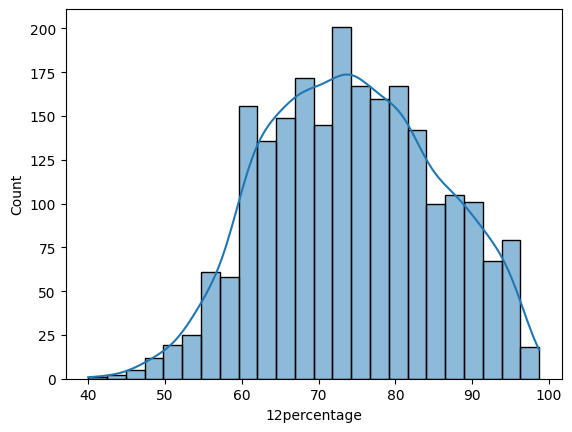

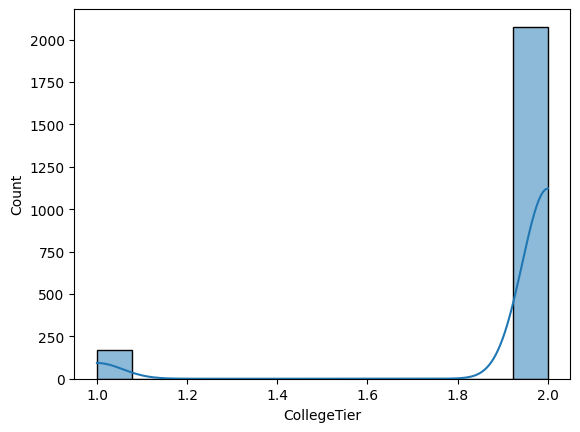

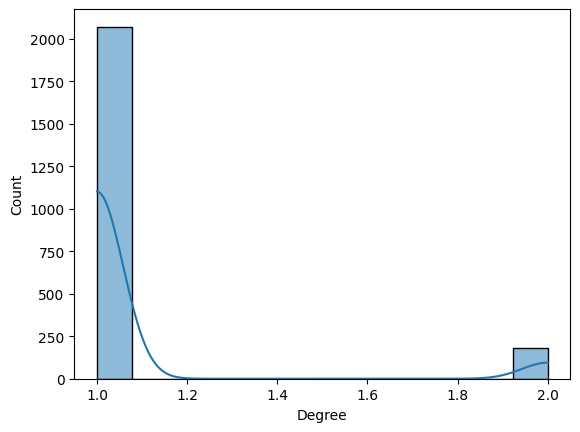

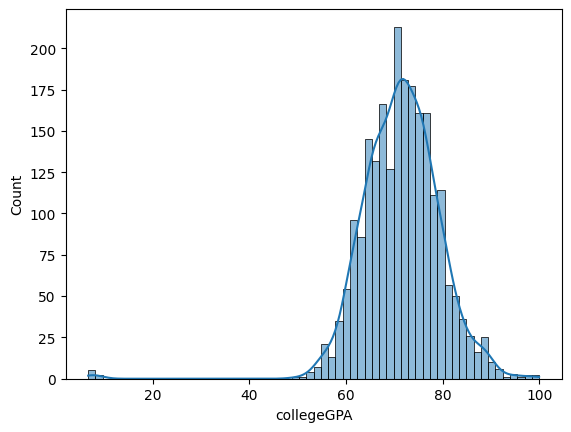

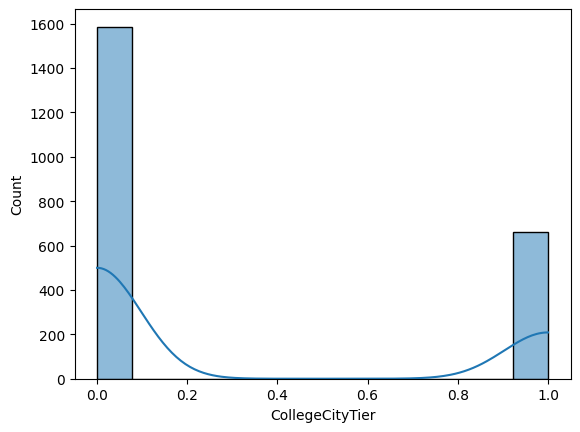

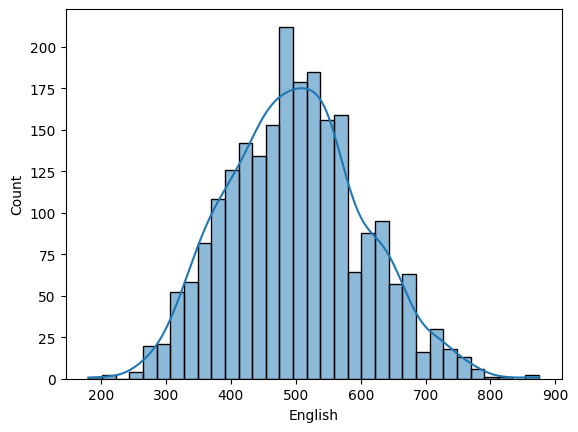

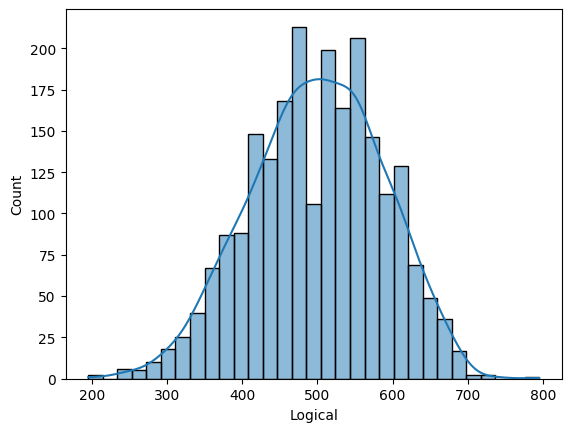

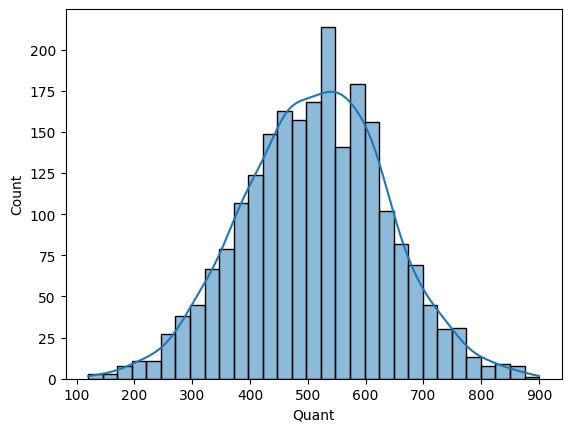

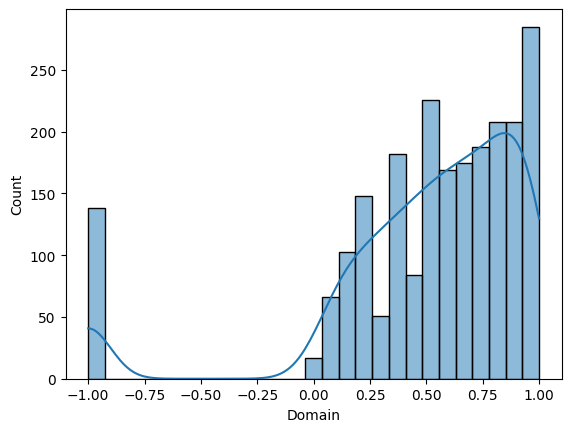

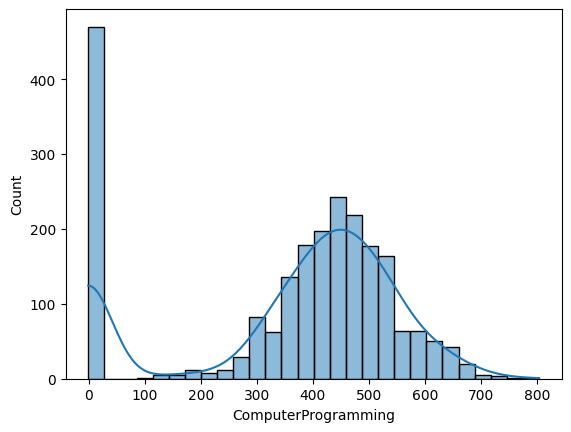

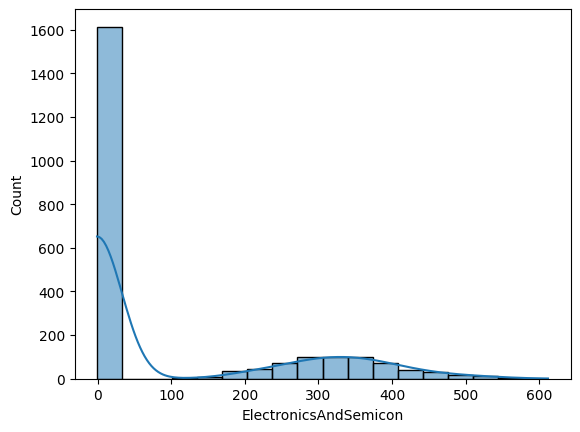

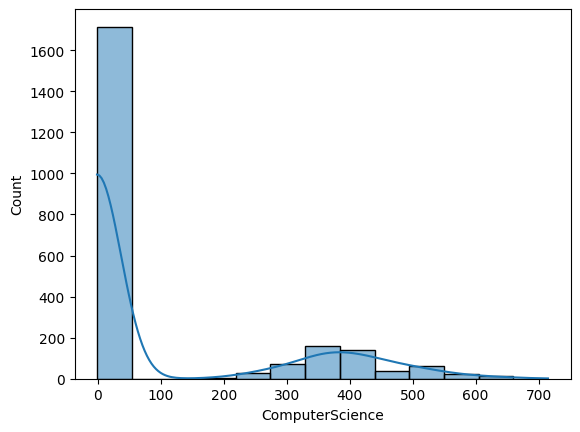

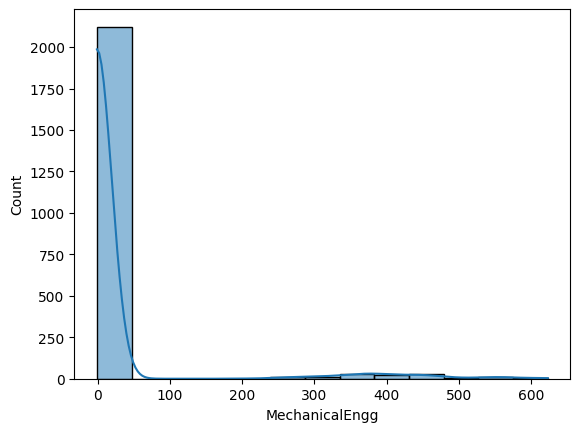

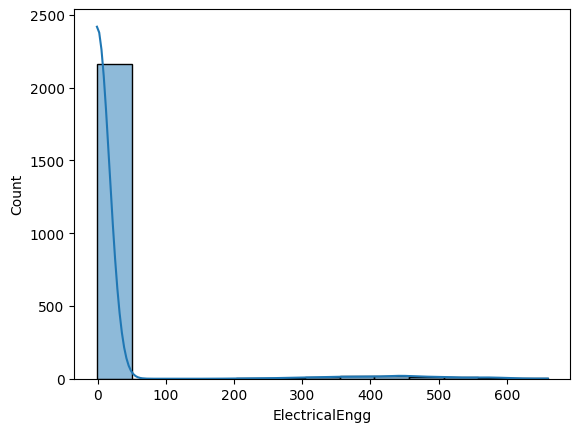

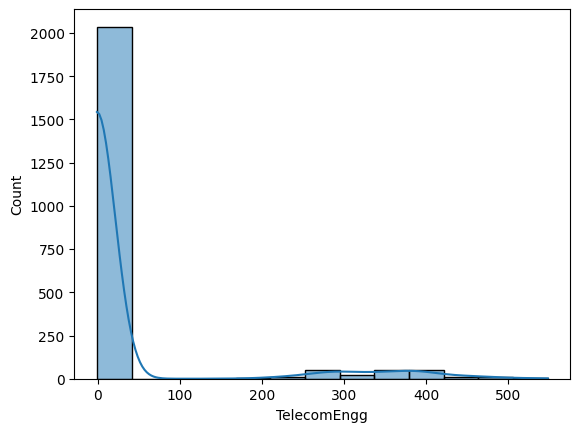

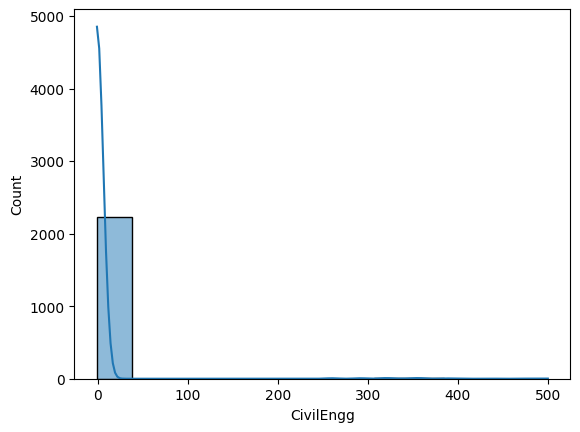

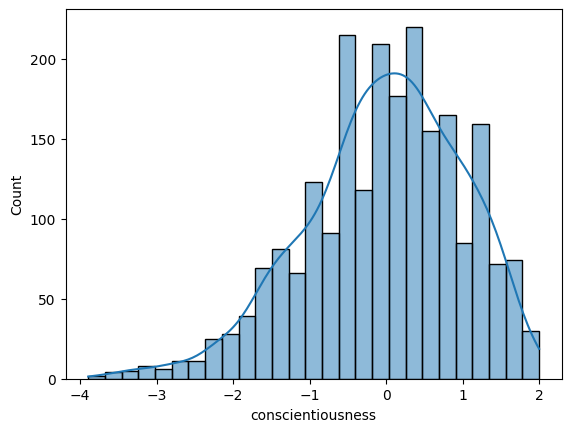

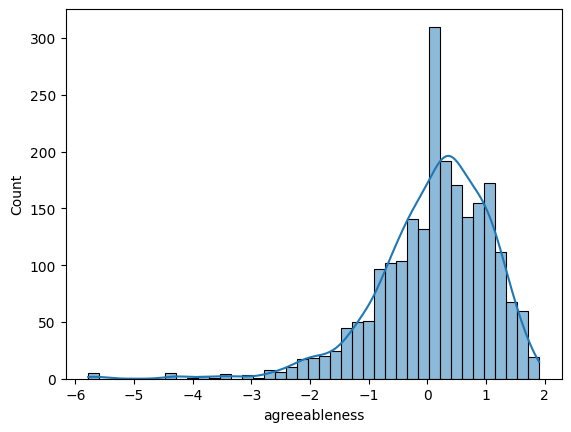

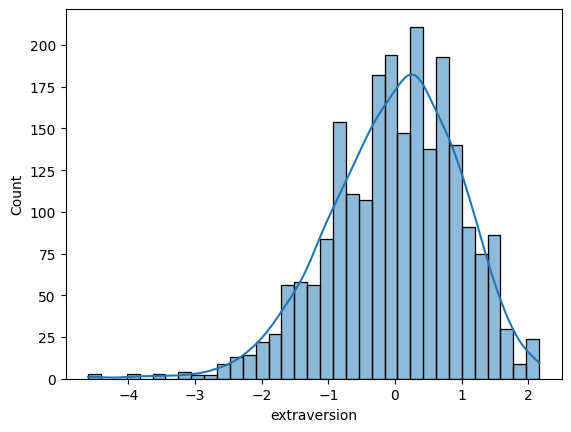

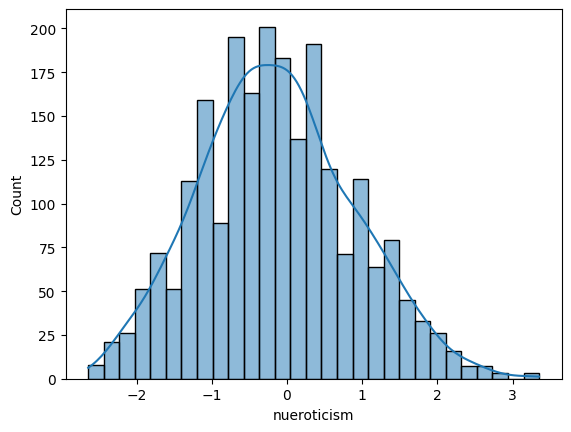

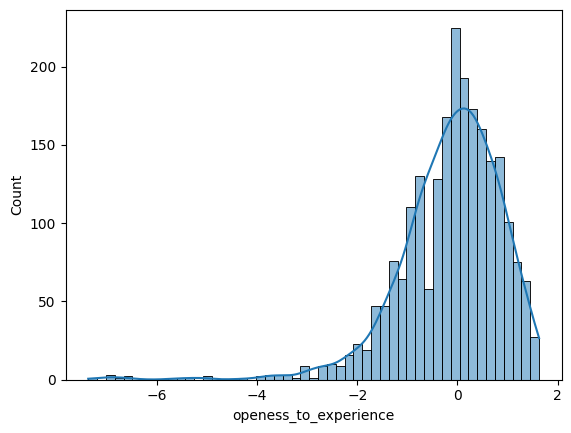

In [58]:
# dùng histogram để thể hiện sự phân phối của mỗi biến trong bộ dữ liệu train
plt.rcParams.update({'figure.max_open_warning': 0})
for col in train.columns:
    if col == 'Salary':
        continue
    plt.figure()
    sns.histplot(data=train, x=col, kde = True)

In [59]:
# từ các biểu đồ histogram trên, sử dụng các biến có phân phối chuẩn cho mô hình 1
model1 = ['collegeGPA', 'Logical', 'Quant', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

<Axes: >

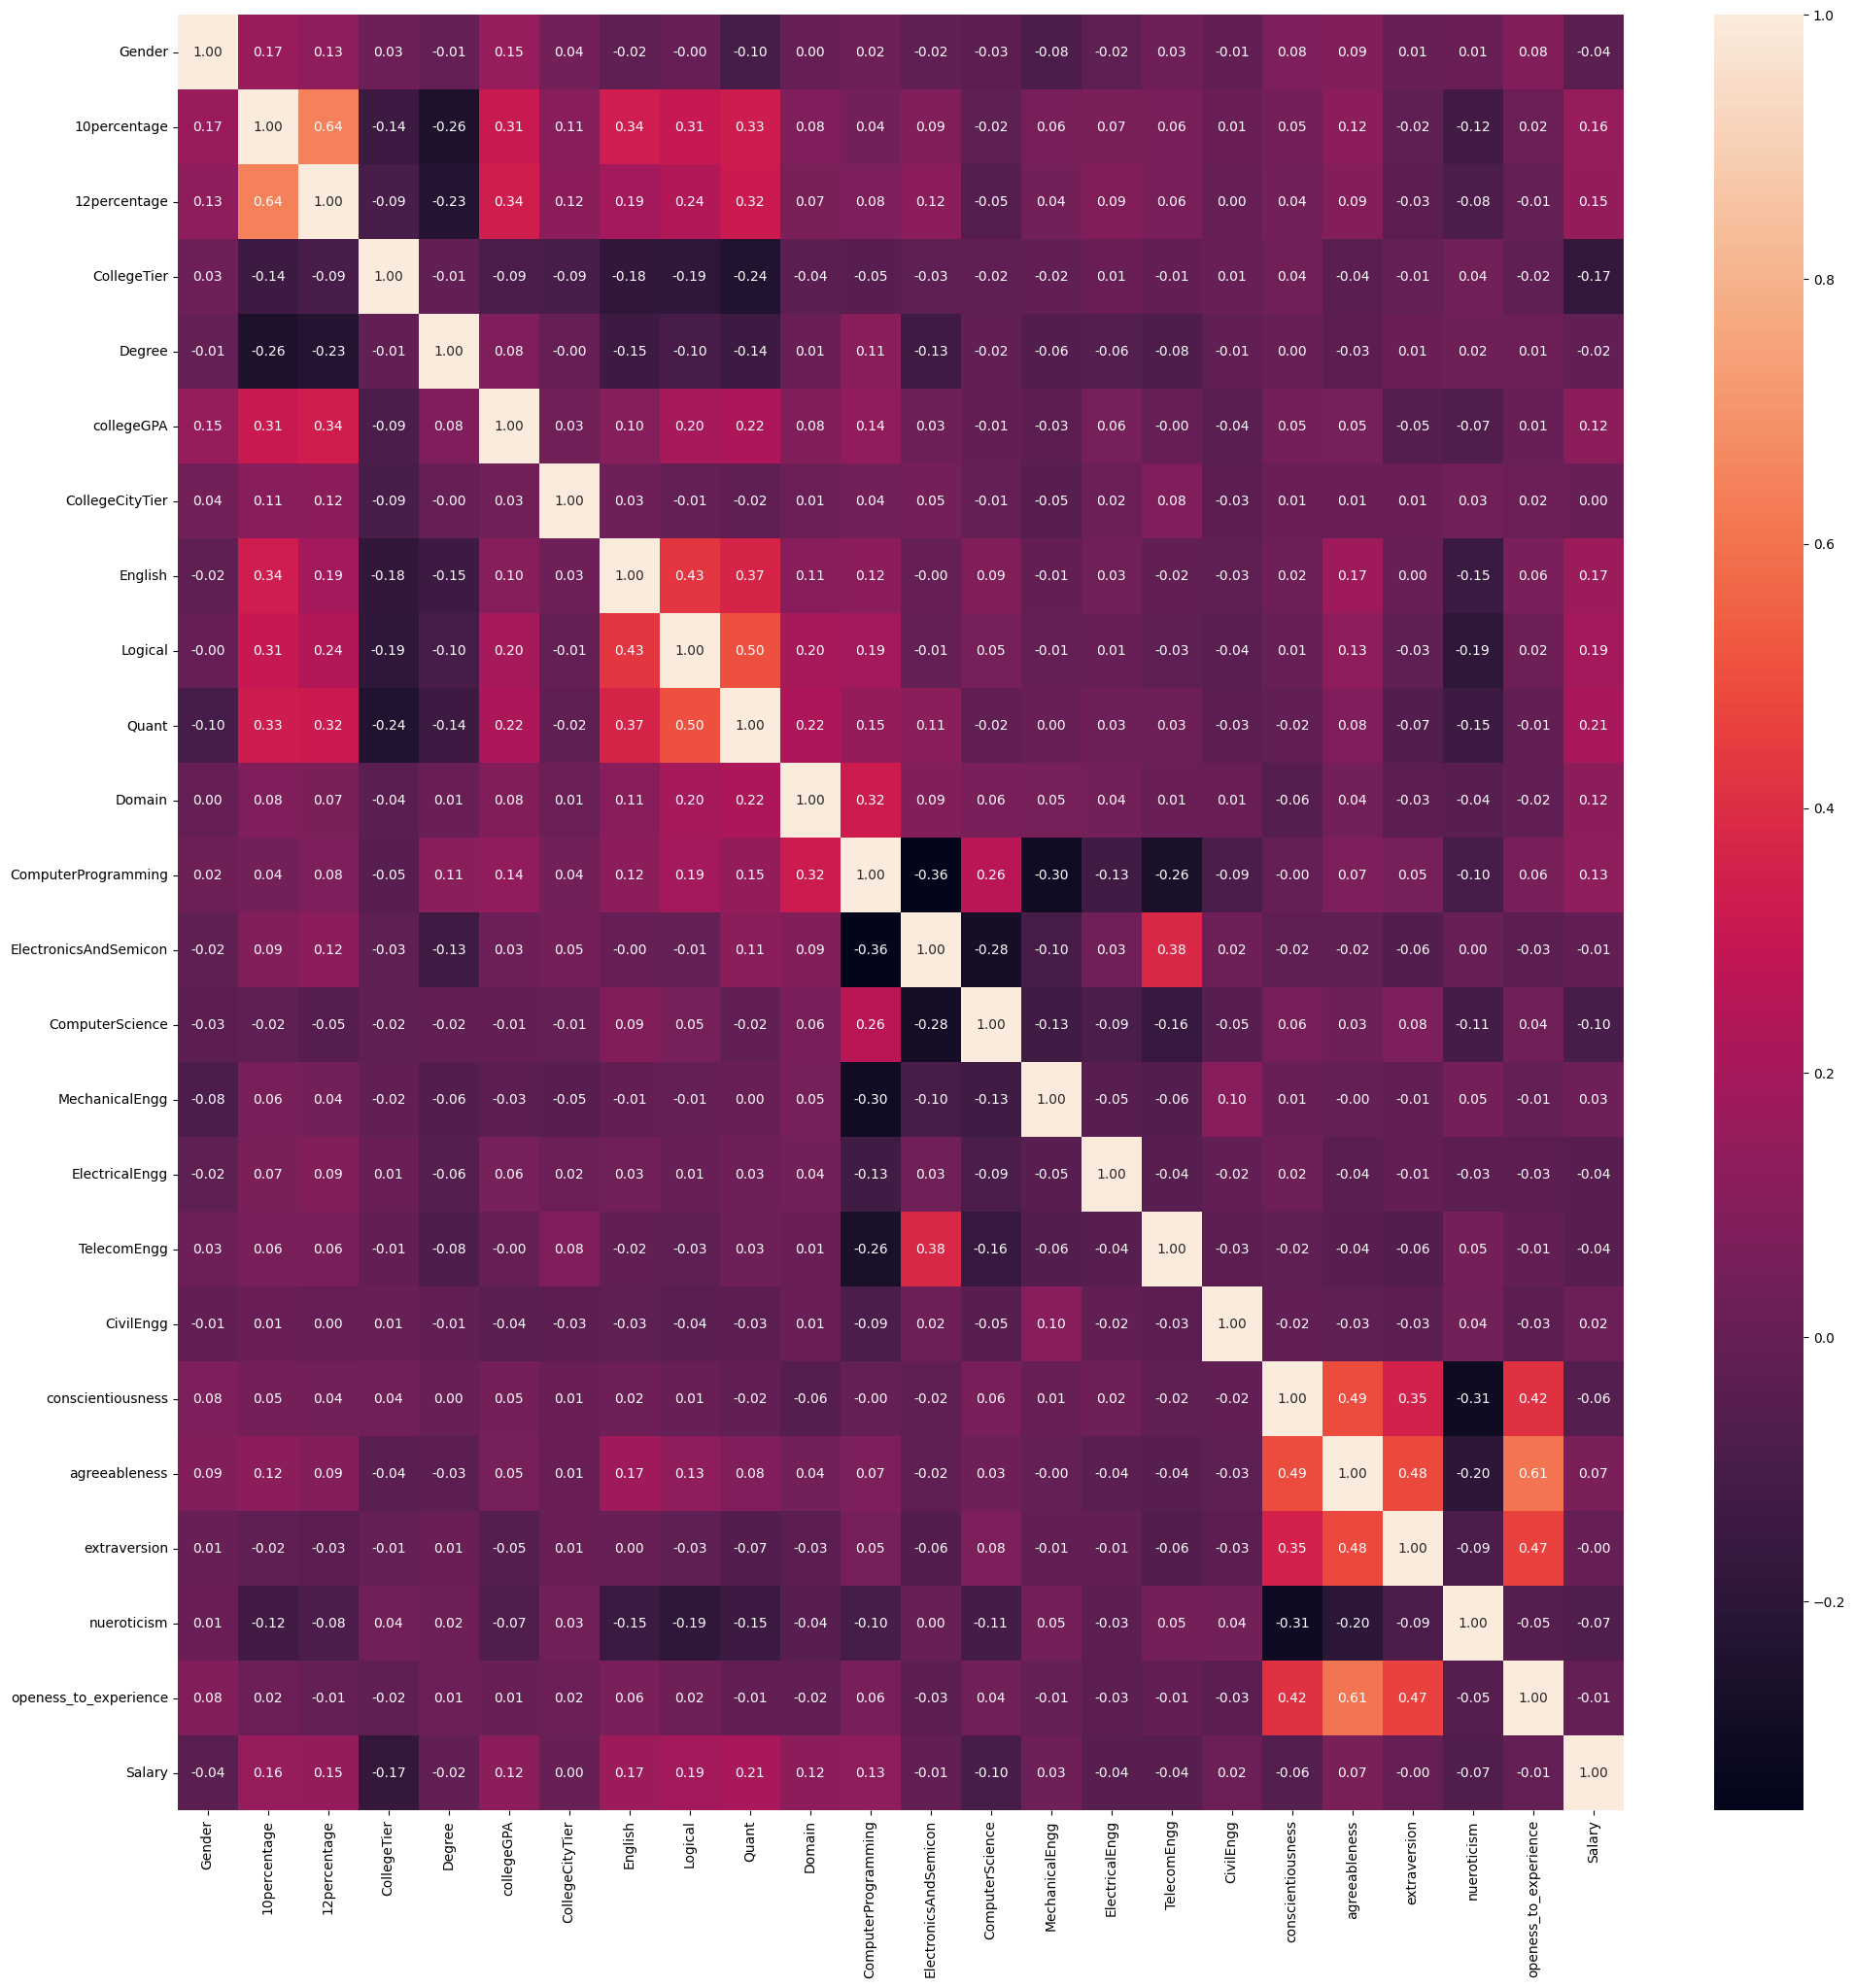

In [60]:
# dùng heatmap thể hiện độ tương quan giữa các biến trong bộ dữ liệu train
plt.figure(figsize = (24,24))
sns.heatmap(train.corr(), annot=True, fmt='.2f')

In [61]:
# sử dụng những biến có độ tương quan với biến mục tiêu >= 0.15 cho mô hình 2
model2 = ['10percentage', '12percentage', 'CollegeTier', 'English', 'Logical', 'Quant']

<Axes: >

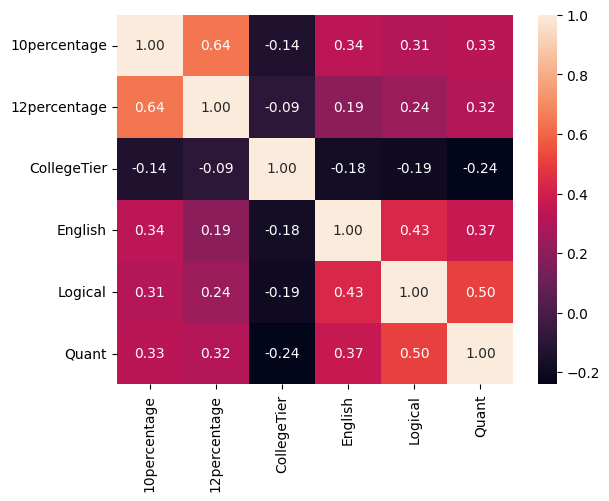

In [62]:
# thể hiện độ tương quan giữa các biến trong mô hình 2
sns.heatmap(train[['10percentage', '12percentage', 'CollegeTier', 'English', 'Logical', 'Quant']].corr(), annot=True, fmt='.2f')

In [63]:
# sử dụng thêm 2 đặc trưng khác là trung bình của các biến liên quan lẫn nhau được quan sát từ biểu đồ heatmap trên
# lấy giá trị trung bình của 2 đặc trưng 10percentage và 12percentage 
train['avg_10_12'] = train[['10percentage', '12percentage']].mean(axis=1) 
# lấy giá trị trung bình của 3 đặc trưng English, Logical và Quant
train['avg_eng_logic_quant'] = train[['English', 'Logical', 'Quant']].mean(axis=1)

model3 = ['avg_10_12', 'CollegeTier', 'avg_eng_logic_quant']

## Thử nghiệm, so sánh các mô hình

In [64]:
# Phần code cho yêu cầu 1d

# Các mô hình được xây dựng
models = [model1, model2, model3]

# Tìm ra mô hình tốt nhất
def findBestModel(trainData, models):
    y_train = np.array(trainData.loc[:, 'Salary'])
    resList = []
    for model in models:
        X_train = np.array(trainData.loc[:, model])
        mae = kFoldCrossValidation(X_train, y_train, 5)
        resList.append(mae)
    # In ra các kết quả cross-validation như yêu cầu
    df = pd.DataFrame({'Mô hình với đặc trưng': models, 'MAE': resList})
    print(df)
    return models[np.argmin(resList)]

# xáo trộn bộ dữ liệu
trainShuffle = train.sample(frac=1, random_state=162)

# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
my_best_model = findBestModel(trainShuffle, models)
print('Mô hình tốt nhất:', my_best_model)

                               Mô hình với đặc trưng            MAE
0  [collegeGPA, Logical, Quant, agreeableness, ex...  115847.087345
1  [10percentage, 12percentage, CollegeTier, Engl...  114961.311919
2      [avg_10_12, CollegeTier, avg_eng_logic_quant]  114665.904912
Mô hình tốt nhất: ['avg_10_12', 'CollegeTier', 'avg_eng_logic_quant']


In [65]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
X_train = np.array(trainShuffle.loc[:, my_best_model])
y_train = np.array(trainShuffle.loc[:, 'Salary'])
X, y = preprocess(X_train, y_train)
lr = OLSLinearRegression().fit(X, y)

w = lr.get_params()

# show equation
print('Salary =', end=' ')
for i in range(len(my_best_model) + 1):
    print(' + ' if i != 0 else '', f'{w[i]}', f'*{my_best_model[i-1]}' if i != 0 else '', end='', sep='')

Salary = 117198.824 + 1917.628*avg_10_12 + -99150.289*CollegeTier + 466.101*avg_eng_logic_quant

In [66]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

# lấy giá trị trung bình của 2 đặc trưng 10percentage và 12percentage 
test['avg_10_12'] = test[['10percentage', '12percentage']].mean(axis=1) 
# lấy giá trị trung bình của 3 đặc trưng English, Logical và Quant
test['avg_eng_logic_quant'] = test[['English', 'Logical', 'Quant']].mean(axis=1)
X_test = np.array(test.loc[:, my_best_model])
y_test = np.array(test.loc[:, 'Salary'])

X, y = preprocess(X_test, y_test)

y_hat = lr.predict(X)

print(f'MAE của mô hình tốt nhất {my_best_model}: {mae(y_test, y_hat)}')

MAE của mô hình tốt nhất ['avg_10_12', 'CollegeTier', 'avg_eng_logic_quant']: 106032.1484141333


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = ...$$